## PCA with Supervised Algorithms

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pyplot import matplotlib

In [2]:
df = pd.read_csv("Wine.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.shape

(178, 14)

In [5]:
df.Customer_Segment.unique()

array([1, 2, 3])

In [6]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

<AxesSubplot:>

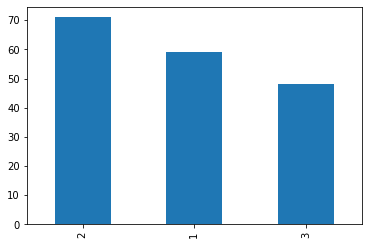

In [7]:
df.Customer_Segment.value_counts().plot.bar()

In [8]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


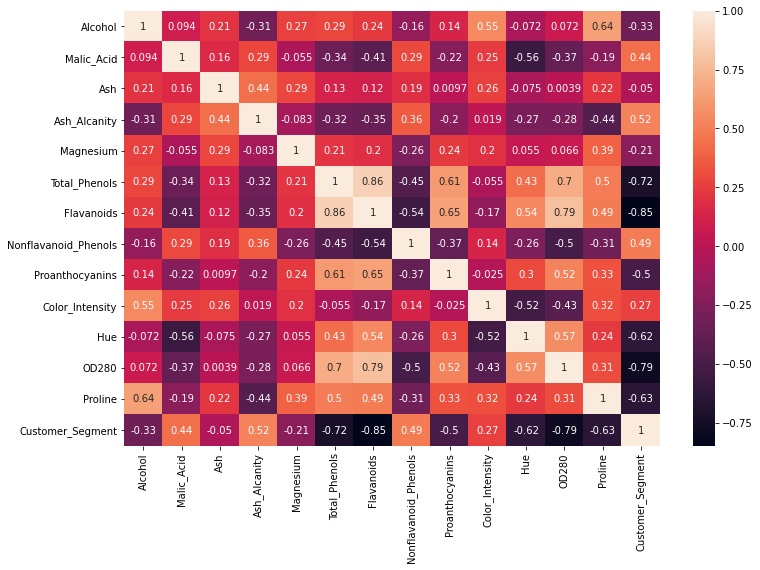

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

<AxesSubplot:>

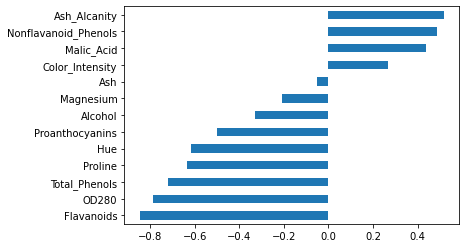

In [10]:
df.corr()["Customer_Segment"][:-1].sort_values().plot.barh()

In [11]:
df.isnull().sum().any()

False

### Split the Data

In [12]:
X = df.drop("Customer_Segment", axis = 1)

In [13]:
y = df["Customer_Segment"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

### Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train_ = X_train

### Modeling With Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [23]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score

In [24]:
inner_clf = RandomForestClassifier(random_state = 0)
clf = MultiOutputClassifier(inner_clf).fit(X_train, pd.get_dummies(y_train))
y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X_test)])
roc_auc_score(pd.get_dummies(y_test), y_score, average=None)

array([1., 1., 1.])

In [25]:
classifier.feature_importances_

array([0.12930939, 0.02858818, 0.01005337, 0.02107876, 0.02670528,
       0.04826478, 0.17041694, 0.01237242, 0.01801449, 0.17606478,
       0.06869346, 0.09987653, 0.19056163])

In [26]:
df.iloc[:,:-1].columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [27]:
feats = pd.DataFrame(index=df.iloc[:,:-1].columns, data= classifier.feature_importances_, 
                     columns=['Importance'])
feats

,Importance
Alcohol,0.129309
Malic_Acid,0.028588
Ash,0.010053
Ash_Alcanity,0.021079
Magnesium,0.026705
Total_Phenols,0.048265
Flavanoids,0.170417
Nonflavanoid_Phenols,0.012372
Proanthocyanins,0.018014
Color_Intensity,0.176065


In [28]:
imp_feats = feats.sort_values("Importance")

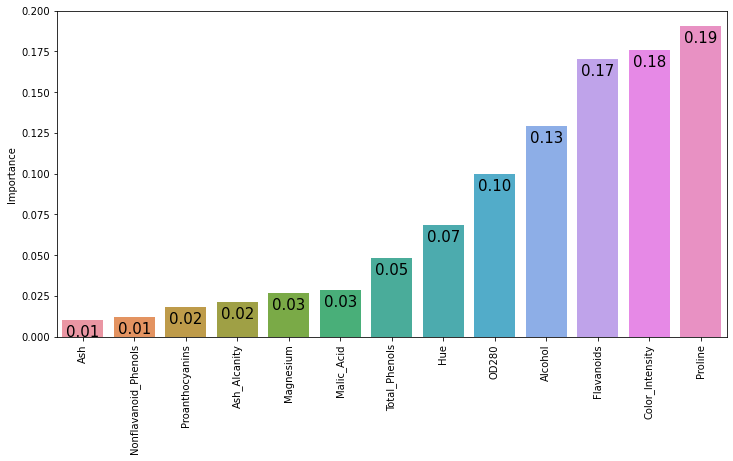

In [29]:
plt.figure(figsize=(12,6))
splot = sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Remodelling By Feature Importance

In [30]:
X2 = df[["Proline", "Color_Intensity", "Flavanoids"]]
# Burada Features Importance ile en önemli features larımızdan 3 ünü seçip DataFrame mizi oluşturuyoruz.
# Features Importance ve Lasso ile bazı features larımızı düşürerek hesaba katmıyoruz fakat PCA tüm fetaures ları değerlendiriyor. 

In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, stratify=y, random_state = 0)

In [32]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [33]:
classifier2 = RandomForestClassifier(random_state = 0)
classifier2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=0)

In [34]:
y_pred2 = classifier2.predict(X_test2)

In [35]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



### PCA

In [36]:
from sklearn.decomposition import PCA

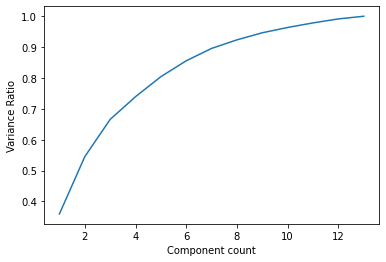

In [37]:
pca = PCA().fit(X_train)
x = range(1,14)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");
# Buradan 2 component ile devam etmeye karar verdik

In [38]:
pca = PCA(n_components = 2)

In [39]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Burada da önceki modellerde olduğu gibi test datasını fit yapmadık data leakage ı önlemek için
# fit işlemi X_train'e göre katsayıları belirliyor.
# transform işlemi de bu katsayılara göre dönüşümü sağlıyor.
# Bu kapsamda X_test datası X_train katsayıları ile dönüşüme uğradı.

In [40]:
df_pca_train=pd.DataFrame(X_train)
df_pca_train.head()

,0,1
0,-0.783937,-1.590432
1,-1.792083,0.583400
2,2.101051,2.109598
3,3.107242,0.448619
4,0.725718,-2.107998


In [41]:
df_pca_test=pd.DataFrame(X_test)
df_pca_test.head()

,0,1
0,0.510682,-1.703429
1,-1.431099,0.675556
2,1.517576,-1.098461
3,-2.504356,1.651059
4,-0.335949,-2.097911


### Modelling After PCA

In [42]:
classifier3 = RandomForestClassifier(random_state = 0)
classifier3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
y_pred = classifier3.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 1, 13,  0],
       [ 0,  0, 10]])

In [44]:
print(classification_report(y_test, y_pred))
# zipledim ve klasifikasyonu iki boyutta gösterebilir hale geldim. Bizim 2 component imiz %55 gibi bir değere (y ekseni) denk gelmesine rağmen modelimiz çok iyi sonuç verdi. Cünkü bu bilgi konsantre (ziplenmiş) bilgi. 

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



### Interpreting PCA Results

In [45]:
scaled_df = pd.DataFrame(X_train_, columns = df.columns[:-1])

In [46]:
combined_df = pd.concat([df_pca_train, scaled_df], axis=1)
correlation = combined_df.corr()

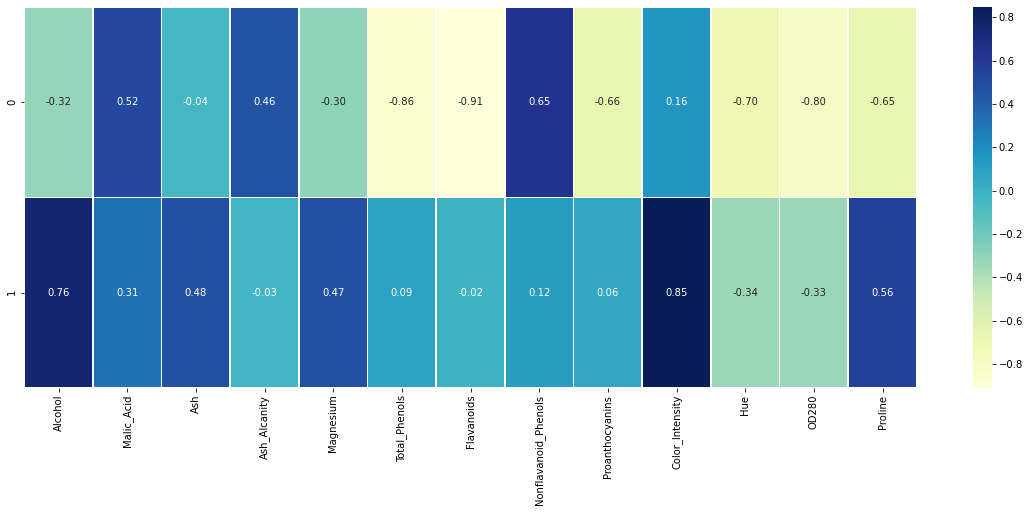

In [47]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:2,2:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()
# Not: PCA multicollinearity olan features ları bir araya toplayarak oluşturulan component lar arasındaki correlasyonu ortadan kaldırıyor. Biz de component lara bakarak hangi features ların birlikte hareket ettiğini yorumlayabiliriz. Her bir component teki features birlikte hareket ediyor.
# Not: Aşağıdaki grafikte 0 ve 1 inci component lerdeki features ların değerlerine bakarak kendi aralarında doğru ve ters orantı belirleyebiliriz. Fakat component lerin kendi aralarında bir correlation yoktur o yüzden component lerin features ları arasında karşılıklı bir yorum yapamayız. 